# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe.

In [135]:
import pandas as pd
import numpy as np

import patsy
import sqlite3
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
import pandas as pd
from pandas.io import sql



con = sqlite3.connect("../../assets/datasets/adult.sqlite")
df = pd.read_sql_query("SELECT * from adult", con)


In [136]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [137]:
df.shape

(48842, 15)

In [138]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [139]:

#which columns does have NAN in the real data
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [140]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
salary               0
dtype: int64

In [141]:
df["workclass"] = df["workclass"].fillna("unknown_class")


In [143]:
df["occupation"] = df["occupation"].fillna("unknown_occupation")


In [144]:
df["native-country"] = df["native-country"].fillna("unknown_native-country")


## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [145]:
df['Target'] = np.where(df['salary'] =='<=50K', '1', '0')


In [146]:
df.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0


### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

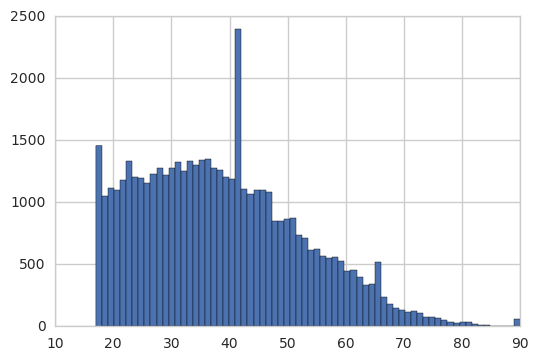

In [147]:
%matplotlib inline
df['age'].astype(int).hist(bins=70)

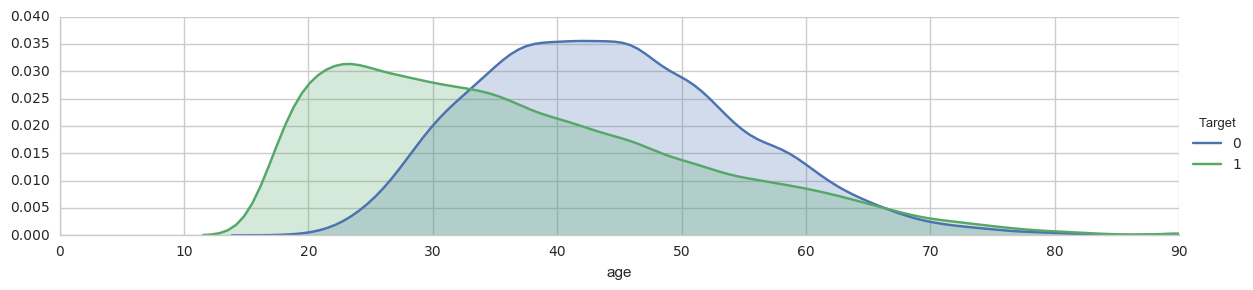

In [148]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


facet = sns.FacetGrid(df, hue="Target",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()



The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

# Workclass

In [149]:
df_dummies_workclass  = pd.get_dummies(df['workclass'])

In [152]:
df_dummies_workclass.columns = ['Federal-gov','Local-gov', 'Never-worked','Private','Self-emp-inc','Self-emp-not-inc', 'State-gov','Without-pay','unknown_class']

In [153]:
df_dummies_workclass.drop(['Never-worked'], axis=1, inplace=True)


In [154]:
df =df.join(df_dummies_workclass)

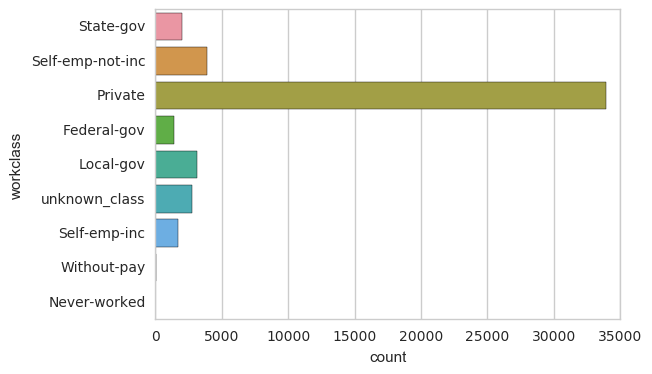

In [155]:
sns.countplot(y='workclass', data=df)

In [157]:
import copy
df_save = copy.deepcopy(df)

# Education

In [158]:
df_dummies_education  = pd.get_dummies(df['education'])


In [160]:
df_dummies_education.columns =['10th', '11th', '12th', '1st-4th', '5th-6th','7th-8th', '9th','Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad','Masters', 'Preschool', 'Prof-school', 'Some-college']

In [131]:
df_dummies_education.drop(['Preschool'], axis=1, inplace=True)

In [161]:
df =df.join(df_dummies_education)


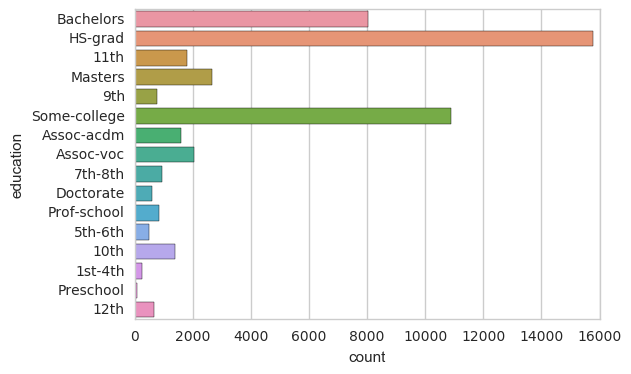

In [163]:
sns.countplot(y='education', data=df)

In [164]:
df_save1 = copy.deepcopy(df)

# marital-status

In [ ]:
df_dummies_marital_status  = pd.get_dummies(df['marital-status'])

In [166]:
df_dummies_marital_status.columns =['Divorced', 'Married-AF-spouse', 'Married-civ-spouse','Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

In [167]:
df_dummies_marital_status.drop(['Married-AF-spouse'], axis=1, inplace=True)

In [168]:
df =df.join(df_dummies_marital_status)

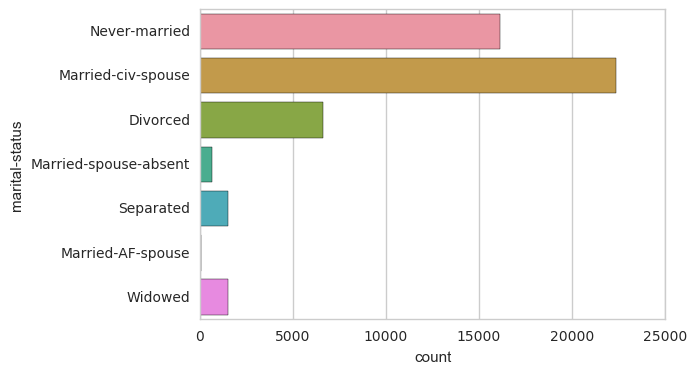

In [169]:


sns.countplot(y='marital-status', data=df)

In [170]:
df_save2 = copy.deepcopy(df)

# occupation

In [ ]:
df_dummies_occupation  = pd.get_dummies(df['occupation'])

In [172]:
df_dummies_occupation.columns = ['Adm-clerical','Armed-Forces','Craft-repair','Exec-managerial','Farming-fishing', 'Handlers-cleaners','Machine-op-inspct','Other-service','Priv-house-serv','Prof-specialty','Protective-serv','Sales','Tech-support','Transport-moving','unknown_occupation']

In [173]:
df_dummies_occupation.drop(['Armed-Forces'], axis=1, inplace=True)

In [174]:
df =df.join(df_dummies_occupation)

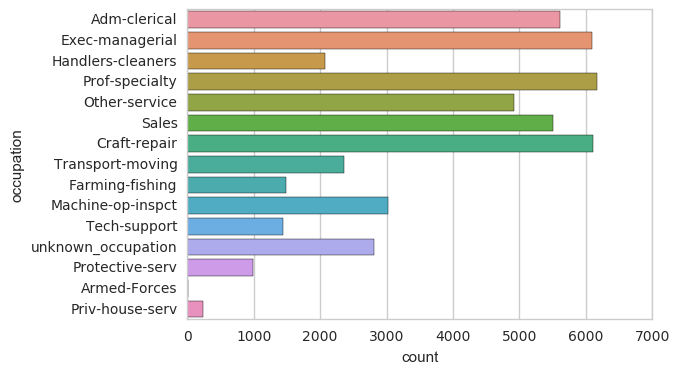

In [175]:


sns.countplot(y='occupation', data=df)

In [176]:
df_save3 = copy.deepcopy(df)

# relationship

In [177]:
df_dummies_relationship  = pd.get_dummies(df['relationship'])

In [179]:
df_dummies_relationship.columns= ['Husband', 'Not-in-family', 'Other-relative', 'Own-child','Unmarried', 'Wife']

In [180]:
df_dummies_relationship .drop(['Other-relative'], axis=1, inplace=True)

In [181]:

df =df.join(df_dummies_relationship)

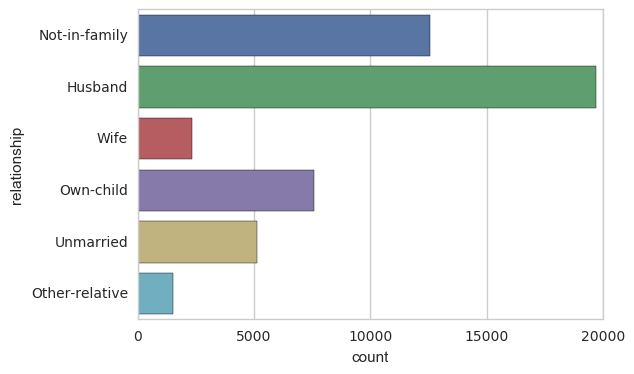

In [182]:

sns.countplot(y='relationship', data=df)

In [183]:
df_save4 = copy.deepcopy(df)

# RACE

In [184]:
df_dummies_race  = pd.get_dummies(df['race'])

In [186]:
df_dummies_race.columns =['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other','White']

In [187]:
df_dummies_race.drop(['Other'], axis=1, inplace=True)

In [188]:
df =df.join(df_dummies_race)

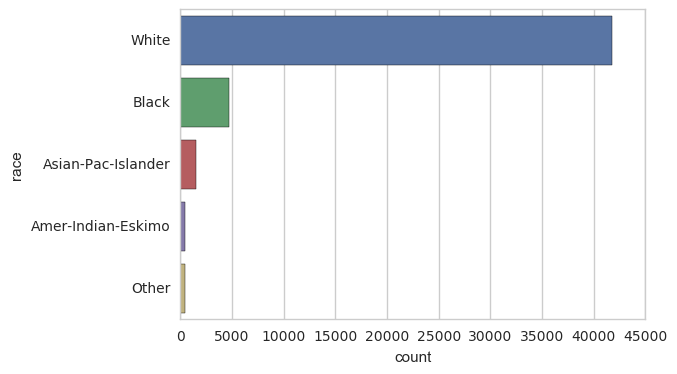

In [189]:


sns.countplot(y='race', data=df)

In [190]:
df_save5 = copy.deepcopy(df)

# sex

In [191]:
df_dummies_sex  = pd.get_dummies(df['sex'])

In [193]:
df_dummies_sex .columns = ['Female', 'Male']

In [194]:
df_dummies_sex.drop(['Female'], axis=1, inplace=True)

In [195]:
df =df.join(df_dummies_sex)

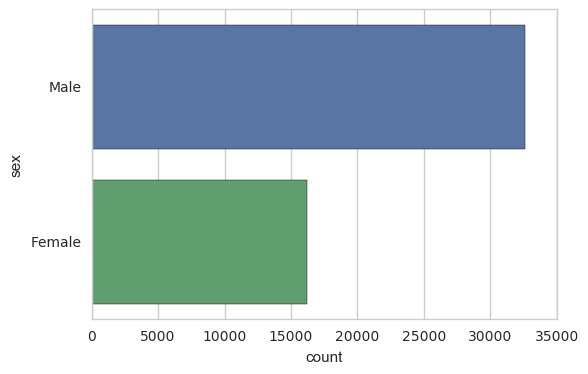

In [196]:


sns.countplot(y='sex', data=df)

In [197]:
df_save6 = copy.deepcopy(df)

In [198]:
df.shape

(48842, 70)

### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

# workclass
# education
# marital-status
# occupation
# relationship
# race
# sex


In [210]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Husband,Not-in-family,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,White,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


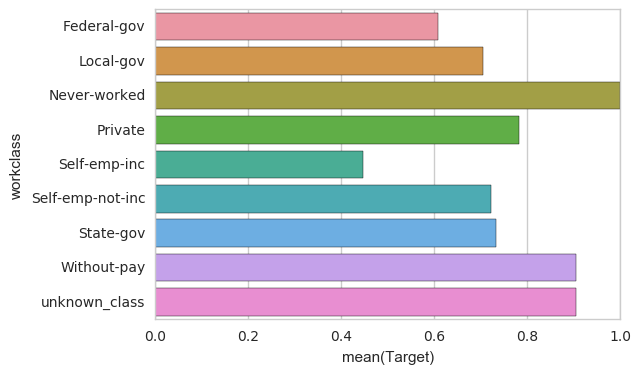

In [213]:
# workclass
person_perc = df[["workclass", "Target"]].groupby(['workclass'],as_index=False).mean()
sns.barplot(y='workclass', x='Target', data=person_perc, order=['Federal-gov','Local-gov', 'Never-worked','Private','Self-emp-inc','Self-emp-not-inc', 'State-gov','Without-pay','unknown_class'])



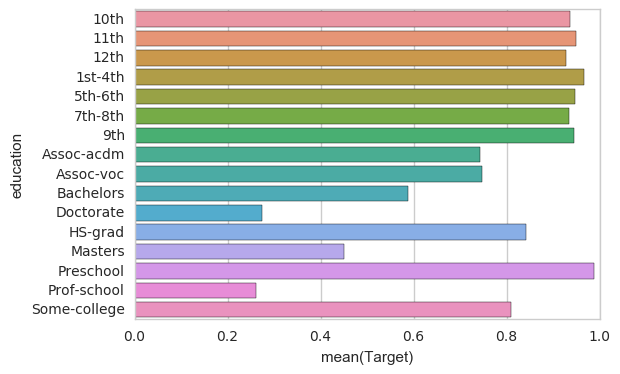

In [214]:
# education
person_perc = df[["education", "Target"]].groupby(['education'],as_index=False).mean()
sns.barplot(y='education', x='Target', data=person_perc, order=['10th', '11th', '12th', '1st-4th', '5th-6th','7th-8th', '9th','Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad','Masters', 'Preschool', 'Prof-school', 'Some-college'])


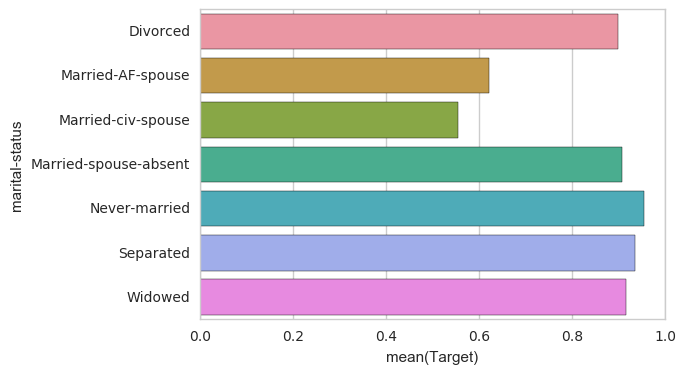

In [215]:
# marital-status
person_perc = df[["marital-status", "Target"]].groupby(['marital-status'],as_index=False).mean()
sns.barplot(y='marital-status', x='Target', data=person_perc, order=['Divorced', 'Married-AF-spouse', 'Married-civ-spouse','Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'])


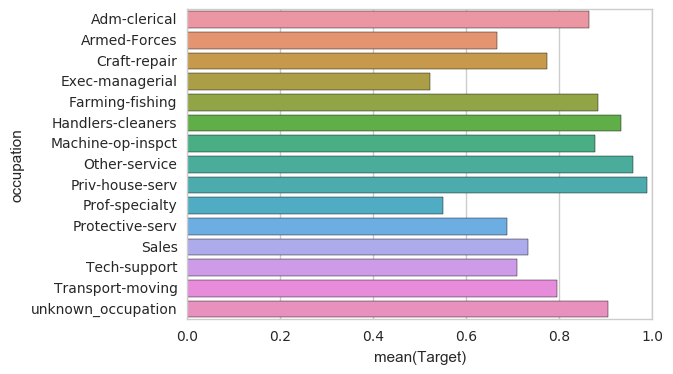

In [216]:
# occupation
person_perc = df[["occupation", "Target"]].groupby(['occupation'],as_index=False).mean()
sns.barplot(y='occupation', x='Target', data=person_perc, order=['Adm-clerical','Armed-Forces','Craft-repair','Exec-managerial','Farming-fishing', 'Handlers-cleaners','Machine-op-inspct','Other-service','Priv-house-serv','Prof-specialty','Protective-serv','Sales','Tech-support','Transport-moving','unknown_occupation'])


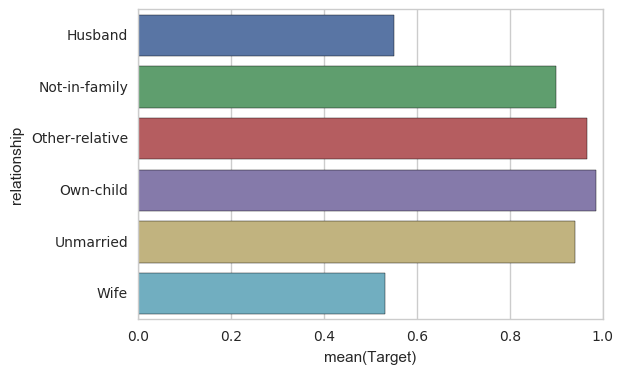

In [217]:
# relationship
person_perc = df[["relationship", "Target"]].groupby(['relationship'],as_index=False).mean()
sns.barplot(y='relationship', x='Target', data=person_perc, order=['Husband', 'Not-in-family', 'Other-relative', 'Own-child','Unmarried', 'Wife'])


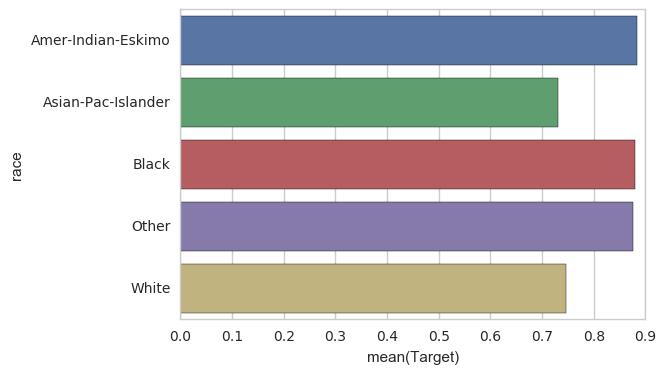

In [219]:
# race
person_perc = df[["race", "Target"]].groupby(['race'],as_index=False).mean()
sns.barplot(y='race', x='Target', data=person_perc, order=['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other','White'])


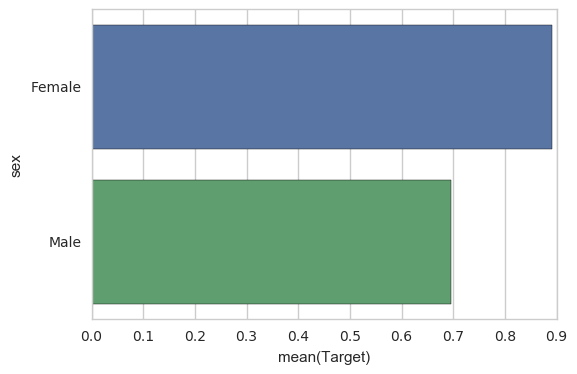

In [218]:
# sex
person_perc = df[["sex", "Target"]].groupby(['sex'],as_index=False).mean()
sns.barplot(y='sex', x='Target', data=person_perc, order=['Female', 'Male'])


## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

## 6. Additional Exploratory Data Analysis

Conduct additional exploratory data analysis. These must include both univariate and bivariate analyses.

## 7. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

# simple model

In [224]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'salary', u'Target', u'Federal-gov', u'Local-gov', u'Private',
       u'Self-emp-inc', u'Self-emp-not-inc', u'State-gov', u'Without-pay',
       u'unknown_class', u'10th', u'11th', u'12th', u'1st-4th', u'5th-6th',
       u'7th-8th', u'9th', u'Assoc-acdm', u'Assoc-voc', u'Bachelors',
       u'Doctorate', u'HS-grad', u'Masters', u'Preschool', u'Prof-school',
       u'Some-college', u'Divorced', u'Married-civ-spouse',
       u'Married-spouse-absent', u'Never-married', u'Separated', u'Widowed',
       u'Adm-clerical', u'Craft-repair', u'Exec-managerial',
       u'Farming-fishing', u'Handlers-cleaners', u'Machine-op-inspct',
       u'Other-service', u'Priv-house-serv', u'Prof-specialty',
       u'Protective-serv', u'Sales', u'Tech-support', u'Transport-moving',

In [229]:
# Set up fake X and Y
X = df[[ u'Federal-gov', u'Local-gov', u'Private',
       u'Self-emp-inc', u'Self-emp-not-inc', u'State-gov', u'Without-pay',
       u'unknown_class', u'10th', u'11th', u'12th', u'1st-4th', u'5th-6th',
       u'7th-8th', u'9th', u'Assoc-acdm', u'Assoc-voc', u'Bachelors',
       u'Doctorate', u'HS-grad', u'Masters', u'Preschool', u'Prof-school',
       u'Some-college', u'Divorced', u'Married-civ-spouse',
       u'Married-spouse-absent', u'Never-married', u'Separated', u'Widowed',
       u'Adm-clerical', u'Craft-repair', u'Exec-managerial',
       u'Farming-fishing', u'Handlers-cleaners', u'Machine-op-inspct',
       u'Other-service', u'Priv-house-serv', u'Prof-specialty',
       u'Protective-serv', u'Sales', u'Tech-support', u'Transport-moving',
       u'unknown_occupation', u'Husband', u'Not-in-family', u'Own-child',
       u'Unmarried', u'Wife', u'Amer-Indian-Eskimo', u'Asian-Pac-Islander',
       u'Black', u'White', u'Male']]

Y = df["Target"]

from sklearn.linear_model import LogisticRegression
import numpy as np

logreg = LogisticRegression()
logreg.fit(X, Y)

# coefficients:
print logreg.coef_
print logreg.intercept_

[[-0.28468955  0.36322064  0.25093424 -0.2316899   0.60438709  0.65849017
   0.67278067  0.34234079  1.01176317  0.98882055  0.61890948  1.62620308
   1.27233189  1.31066027  1.3022124  -0.31867958 -0.25235929 -0.90497732
  -2.09791526  0.21975046 -1.37050781  1.47108133 -2.08329056 -0.11453465
   1.18480901 -0.6600918   1.1143316   1.93243658  1.32527337  0.88718392
   0.09267841  0.03525884 -0.82250365  0.71571217  0.86616382  0.45955568
   1.04880479  1.28758145 -0.48395196 -0.40239151 -0.27605618 -0.42026696
   0.08509371  0.64603479 -0.67977857 -0.97910476  0.41324107 -0.65487773
  -1.61132628  0.21239004 -0.13217491 -0.14337294 -0.33176397 -0.77017887]]
[ 2.67946816]


In [235]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=99)
X_train.size


1767096

In [236]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)


In [237]:
from sklearn.metrics import confusion_matrix

confusion = np.array(confusion_matrix(Y_test, Y_pred))

print(confusion)


[[ 2043  1870]
 [  841 11364]]


In [238]:
# calculate true positives, the number of 1s correctly predicted to be 1
TP = confusion[0,0]

# calculate false positives, the number of 0s incorrectly predicted to be 1
FP  = confusion[1,0]

# calculate true negatives, the number of 0s correctly predicted to be 0
TN = confusion[1,1]

# calculate false negatives, the number of 1s incorrectly predicted to be 0
FN = confusion[0,1]



In [239]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print acc


0.83180295322


## 8. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams


In [241]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [244]:
from sklearn import metrics
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(Y_test, y_pred_class)

0.776833354014


In [245]:
# test with 50 neighbors
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(Y_test, y_pred_class)


0.829755552798


In [246]:
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV

In [253]:
## Prepare a Range of Alpha Values to Test
k_vals = [ 1,5,10,50,75,100]
knn = KNeighborsClassifier()

In [254]:
## Create and Fit a GridSearchCV Model

grid = GridSearchCV(estimator=knn, param_grid=dict(n_neighbors=k_vals ))
grid_coef = grid.fit(X_train, Y_train)
print(grid)
grid.best_score_

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


0.82743552132991072